(sec:intro)=
# Uvod v procesiranje signalov

V uvodnem poglavju bomo poskušali v grobem očrtati motivacijo za to knjigo in tudi vsebino, ki jo lahko pričakujete v sledečih poglavjih.

(sec:kaj_je_ps)=
## Kaj je procesiranje signalov?
Termin **procesiranje signalov** uporabljamo za označitev različnih metod obdelave izmerjenih podatkov z namenom, da razkrijemo informacije skrite v takih meritvah. S procesiranjem signalom želimo identificirati/karakterizirati različne fizikalne procese, kot primer takih procesov lahko vidimo klasične inženirske izzive (npr.: napake na ležajih, dinamske lastnosti struktur), pa tudi izzive v biologiji (npr.: sekvenciranje genoma), astronomiji (npr.: merjenje črne luknje), družboslovju (npr.: širjenje corona virusa) in podobno.

Kot primer si lahko pogledamo meritve na novem/poškodovanem ležaju ({cite:t}`slavic2011typical`). Slika spodaj prikazuje meritev sile na dobrem in dveh poškodovanih ležajih. V meritvah vidimo določene razlike, ampak ali lahko iz meritev identificiramo **tip** poškodbe? Nadalje ali lahko iz meritev identificiramo **velikost** poškodbe? Na ta in podobna vprašanja bomo poskušali odgovoriti tekom te knjige.

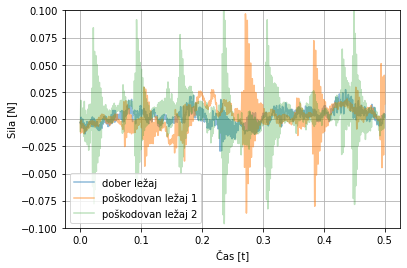

In [1]:
import numpy as np
import matplotlib.pyplot as plt

new = np.load('./data/bearing/new 1A.npy')
radial = np.load('./data/bearing/radial Low 1A.npy')
contamination = np.load('./data/bearing/contam low 2A.npy')
time = np.arange(len(new)) * 1./5000

sel = time<0.5
plt.plot(time[sel], new[sel, 2], alpha=0.5, label='dober ležaj')
plt.plot(time[sel], radial[sel, 2], alpha=0.5, label='poškodovan ležaj 1')
plt.plot(time[sel], contamination[sel, 2], alpha=0.3, label='poškodovan ležaj 2')
plt.xlabel('Čas [t]')
plt.ylabel('Sila [N]')
plt.ylim(-0.1, 0.1)
plt.grid()
plt.legend()
plt.show()

Kot naslednji primer, je spodaj prikazana slika **frekvenčne prenosne funkcije** (*ang.* FRF, Frequency Response Function), ki za **linearni, časovno invariantni sistem** (glejte poglavje {ref}`sec:konvolucija_LTI`) v frekvenčni domeni povezuje vzbujanje sistema z njegovim odzivom (primer je vzet iz paketa [pyUFF](https://github.com/ladisk/pyuff)). Zadnji stavek vsebuje veliko terminov, ki jih v nadaljevanju razdelali in spoznali. Pravilna identifikacija frekvenčne prenosne funkcije je zelo pomembna za karakterizacijo dinamskih sistemov in kako jo pravilno identificiramo, bomo v celoti razumeli šele proti koncu te knjige.

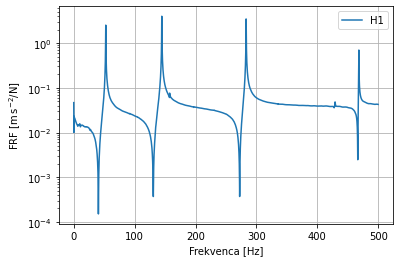

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyuff

uff = pyuff.UFF('./data/uff/beam.uff').read_sets(setn=4)
fr = uff['x']
H1 = uff['data']

sel = fr<500
plt.semilogy(fr[sel], np.abs(H1[sel]), label='H1')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('FRF [m$\,$s$^{-2}$/N]')
plt.grid()
plt.legend()
plt.show()

(sec:kaj_je_sistem)=
## Kaj je sistem?

Dinamske in druge sisteme ponavadi poskušamo opisati na podlagi modelov; parametre modelov pa identificirati s procesiranjem signalov. Spodnja slika prikazuje poljuben sistem, katerega vzbujanje opišemo v času s $x(t)$, odziv pa s $y(t)$. Kot primer vzbujanja $x(t)$ sistema si lahko predstavljamo **silo**, ki deluje na neko **maso**, kot odziv $y(t)$ pa napetost na zaznavalu **pospeška** ali zvočnega tlaka. Odziv je ponavadi res napetost, ki je ponavadi proporcionalna neki merjeni veličini (npr.: pospešek, zvočni tlak), vendar pa je odziv lahko povezan tudi npr. z intenziteto slikovnega elementa v sliki (glejte {cite:t}`gorjup2021still`). 

![sistem-in-out](./images/sistem-in-out.svg)

Tukaj se bomo omejili na takšne sisteme, kjer je odziv rezultat **preteklega in trenutnega vzbujanja** (takšnim sistemom rečemo, da so **kavzalni**). Podobno se bomo omejili samo na takšne sisteme, kjer **odziv ne vpliva nazaj na vzbujanje**. Nadalje bomo v začetku predpostavili, da imamo samo eno vzbujanje in samo en odziv.

## Kaj linearni časovno invariantni sistem?

Ta knjiga bo osredotočena na **linearne časovno invariantne (LČI)** (ang. *linear time invariant systems*, pogosto tudi *LTI systems*), ki jih bomo podrobno spoznali v poglavju: {ref}`sec:LTI`.

:::{note}
LTI je angleška kratica in pomeni **linear time-invariant systems**.
:::

Podrobneje si bomo LČI sisteme pogledali v poglavju {ref}`sec:konvolucija_LTI`, tukaj, v uvodu, se jih bomo zgoj dotaknili. LČI sistemi se na idealni impulz odzovejo z **impulznim odzivom**, ki ga označimo s $h(t)$. Vzbujanje $x(t)$ in odziv $y(t)$ so za LČI sistem povezani z:

$$
y(t)=h(t) * x(t),
$$

kjer znak $*$ označuje matematično operacijo **konvolucije**. Ker je sistem linearen, bo sprememba na strani vzbujanja vodilo v **proporcionalno spremembo** na strani odziva:

$$
k\,y(t)=h(t) * (k\,x(t)),
$$

ker je sistem **časovno invarianten**, bo časovna sprememba na strani vzbujanja (npr. zakasnitev vzbujanja) vodila v isto časovno spremembo na strani odziva:

$$
y(t-\tau)=h(t) * x(t-\tau).
$$

*Primer*: 

kot primer si lahko pogledamo odziv dinamskega sistema z eno prostostno stopnjo na polsinusno motnjo s šumom. Impulzna prenosna funkcija sistema z eno prostostno stopnjo je definirana:

$$
h(t)=\frac{1}{\omega_{0d}}\,e^{-\delta\,\omega_0\,t}\,\sin(\omega_{0d}\,t)
$$

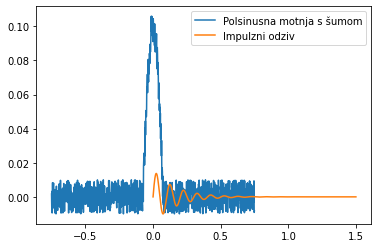

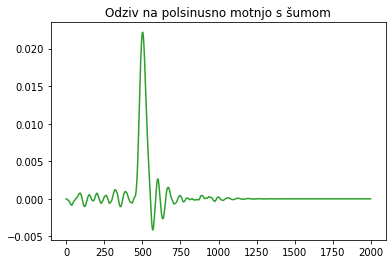

In [3]:
import numpy as np
import matplotlib.pyplot as plt

T = 1.5
N = 1000
w = 0.1
A = 0.1
t = np.linspace(-T/2, T/2, N, endpoint=False)
dt = t[1] - t[0]
x = A*np.cos(2*np.pi*t/(2*w*T))
x[np.logical_or(-w*T*0.5>t, t>w*T*0.5)] = 0.
x = x + 0.2*A*(np.random.rand(N)-0.5)

delta = 0.1 # damping ratio
omega0 = 2*np.pi*10
omega0d = omega0*np.sqrt(1-delta*delta)
th = dt*np.arange(len(x))
h = np.exp(-delta*omega0*th)*np.sin(omega0d*th)/omega0d

plt.plot(t,x, label='Polsinusna motnja s šumom')
plt.plot(th,h, label='Impulzni odziv')
plt.legend()
plt.show()

hx = np.convolve(h, x) # mode='full' -> sum of both arrays
plt.title('Odziv na polsinusno motnjo s šumom')
plt.plot(hx, 'C2')
plt.show()

Konvolucijo bomo spoznali pozneje (glejte: {ref}`sec:fourierova_int_transf`). Tukaj zgolj definirajmo pojme: *Fourierova transformacija* konvolucijo v časovni domeni preoblikuje v preprosto množenje v frekvenčni domeni:

$$
Y(f)=H(f)\,X(f).
$$
Kjer $f$ označuje frekvenco, $Y(f)$, $H(f)$ in $X(f)$ pa predstavljajo Fourierovo transformacijo $y(t)$, $h(t)$ in $x(t)$.

Sistem lahko enolično identificiramo, če identificiramo **frekvenčno prenosno fukcijo** $H(t)$ ali njen časovni par: **impulzno prenosno funkcijo** $h(t)$. Če sta vzbujanje $X(f)$ in odziv $Y(f)$ v frekvenčni domeni znana, je identifikacija (teoretično) skrajno enostavna $H(f)=Y(f)/X(f)$. V praksi je problem v tem, da je meritev vzbujanja in odziva obremenjena z merilnimi in drugimi negotovostmi. Sistem realnega sistema prikazuje spodnja slika; $n_x(t)$ in $n_y(t)$ predstavljata šum na strani vzbujanja in odziva, $x_m(t)$ in $y_m(t)$ pa predstavljata izmerjeno vzbujanje in izmerjeni odziv (s šumom). 

![sistem-in-out-sum](./images/sistem-in-out-sum.svg)

Izmerjeno vzbujanje $x_m(t)$ je očitno drugačno od tistega, ki vzbuja sistem $x(t)$ in izmerjeni odziv $y_m(t)$ je očitno drugače kakor je dejanski odziv $y(t)$. Glede na merilne in druge negotovosti nimamo dostopa do dejanskega vzbujanja $x(t)$ in dejanskega odziva $y(t)$ in zato frekvenčne prenosne funkcije $H(f)$ ne moremo določiti. V poglavju {ref}`sec:cenilke_FRF` si bomo pogledali kako $H(f)$ ocenimo na podlagi veličin, ki jih lahko izmerimo ($x_m(t)$ in $y_m(t)$); takrat bomo govorili o cenilki frekvenčne prenosne funkcije $\tilde{H}(f)$.

(sec:zvezni_diskretni)=
## Zvezni/diskretni podatki

Inženirski procesi so ponavadi zvezni in jih zaznavamo s pomočjo različnih zaznaval, ki generirajo fizikalno merljivo veličino, *t.i.* signal. Signal ali časovna zgodovina je ponavadi tudi **zvezna** veličina (včasih bomo slišali tudi *analogna* veličina). Zaradi obdelave podatkov z računalnikom, te zvezne veličine diskretiziramo (glejte poglavje {ref}`sec:enakomerno_casovno_vzorcenje`). Ponavadi je taka diskretizacija narejena s konstantnim časovnim korakom. Spodnja slika prikazuje zvezno in diskretno časovno vrst. V splošnem ne govorimo niti o signalih, niti o časovnih vrstah, pač pa o podatkih (ang. *data*).

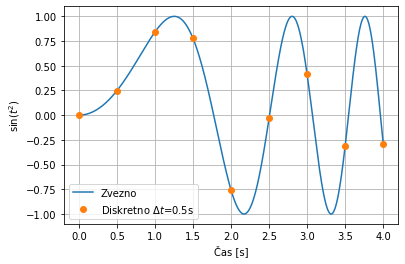

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# na računalniku zvezne časovne vrste dejansko ne moremo generirati
# "zvezna" bo samo dosti bolj gosta
t, dt = np.linspace(0,4,1000, retstep=True)
t2, dt2 = np.linspace(0,4,9, retstep=True)

plt.plot(t, np.sin(t**2), label='Zvezno') 
plt.plot(t2, np.sin(t2**2), 'o',label='Diskretno $\\Delta t$=0.5s')
plt.xlabel('Čas [s]')
plt.ylabel('$\\sin(t^2)$')
plt.grid()
plt.legend()
plt.show()

(sec:klasifikacija_pod)=
## Klasifikacija podatkov

Klasifikacija podatkov (prirejeno po {cite:t}`bendat_2011,shin2008`) je prikazana na spodnji sliki.

![klasifikacija_podatkov](./images/klasifikacija_podatkov.svg)

Podatke najprej delimo na:
* **deterministične** (kdaj slišimo tudi *določljivostne*) to so podatki, ki imajo vrednosti v času enolično določene in
* **naključne** kjer vrednosti v nekem trenutku ekzaktno ne vemo, je pa ta lahko določena z verjetnostno porazdelitvijo.

Primer determinističnih podatkov je funkcija:

$$
x(t) = \sin(t),
$$

primer naključnih podatkov pa je višina gladine razburkanega morja. Pri klasifikaciji podatkov ne smemo pozabiti, da imamo lahko podatke sestavljene iz determinističnega in naključnega dela (npr. meritev profila izdelka vključuje tudi naključno merilno napako).

**Deterministične** podatke naprej delimo na **periodične**, ki se torej po *določenemu času* (periodi) ponovijo in take, ki to niso, torej **neperiodične**. Periodične delimo na *harmonske*, ki jih definira sinusoida poljubne fazne zakasnitve (zato včasih tudi govorimo o sinusnih podatkih) in *kompleksno harmonske*, katere definira vsota več harmonskih komponent. Pri kompleksno harmonskih podatkih je pomembno, da je razmerje frekvenc harmonskih komponent racionalno število, saj se bo v tem primeru perioda ponavljala s periodo najmanjše skupne periode. Če razmerje harmonskih komponent ni racionalno število, govorimo o *skoraj periodičnih* podatkih, kateri pa spadajo v skupino neperiodičnih podatkov. V skupino neperiodičnih podatkov spadajo še rezultati *prehodnih* in *kaotičnih* procesov.

**Naključne** podatke naprej delimo glede na to ali se statistična porazdelitev, ki definirajo naključne podatke s časom spreminja (**nestacionarni**) ali se ne spreminja (**stacionarni**). 

:::{note}
O šibki stacionarnosti govorimo, ko se prva dva statistična momenta porazdelitve (povprečna vrednost in kovarianca) s časom ne spreminjata. 
:::

O močni stacionarnostni govorimo, ko se tudi višji statistični momenti (vključno s križni momenti) s časom ne spreminjajo. 

:::{note}
Če je pri stacionarnem procesu povprečna vrednost in kovarianca enaka ne glede na to ali ta dva statistična momenta določimo iz *časovne vrste* ali iz *naključne porazdelitve*, potem govorimo o šibko **ergodičnem** procesu.
:::

O močno ergodičnem procesu govorimo, če je slednje res tudi za višje statistične momente.

Zgornje definicije bomo bolj podrobno spoznali in tui matematično podprli v poglavju: {ref}`sec:momenti_funkcije_gostote_verjetnosti`.

### Nekateri primeri determinističnih podatkov

Spodja slika prikazuje periodične podatke, najprej je prikazan trikotni signal, ki se ponavlja s periodo 1s, nato je prikazan harmonski signal, ki se prav tako ponavlja s periodo 1s. Zadnji signal predstavlja kompleksno periodične podatke, ki so sestavljeni kot vsota več harmonskih komponent, perioda tega na sliki je 2s.

Pri neperiodičnih podatkih bomo kot primer prikazali prehodne podatke, ki nastanejo, ko dinamski sistem vzbudimo z impulzno motnjo. Kaotičnih neperiodičnih podatkov tukaj ne bomo podrobneje obravnavali; zanje velja, da jih zaradi visoke stopnje dinamičnosti lahko zanesljivo napovedujemo samo za relativno kratek čas v naprej, potem pa se njihovo obnašanje zdi čedalje bolj naključno.

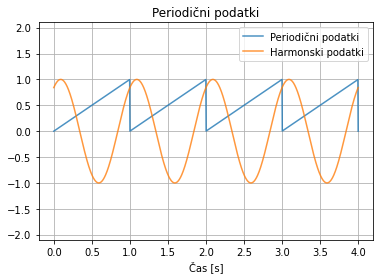

In [5]:
import numpy as np
import matplotlib.pyplot as plt


t, dt = np.linspace(0,4,1000, retstep=True)

plt.title('Periodični podatki')
plt.plot(t, t%1, label='Periodični podatki', alpha=0.8) 
plt.plot(t, np.sin(2*np.pi*t+1), label='Harmonski podatki', alpha=0.8) 
plt.ylim(-2.1,2.1)
plt.xlabel('Čas [s]')
plt.grid()
plt.legend()
plt.show()

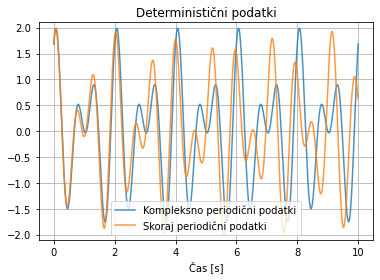

In [6]:
import numpy as np
import matplotlib.pyplot as plt


t, dt = np.linspace(0,10,1000, retstep=True)

plt.title('Deterministični podatki')
plt.plot(t, np.sin(2*np.pi*t+1)+np.sin(3*np.pi*t+1), label='Kompleksno periodični podatki', alpha=0.8)
plt.plot(t, np.sin(2*np.pi*t+1)+np.sin(3.075*np.pi*t+1), label='Skoraj periodični podatki', alpha=0.8)
plt.ylim(-2.1,2.1)
plt.xlabel('Čas [s]')
plt.grid()
plt.legend(loc=8)
plt.show()

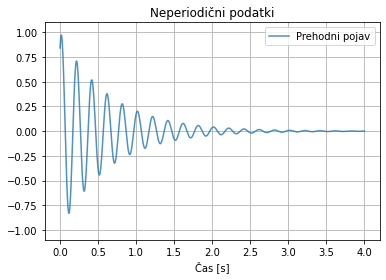

In [7]:
import numpy as np
import matplotlib.pyplot as plt


t, dt = np.linspace(0,4,1000, retstep=True)
omega = 10*np.pi
dušenje = 0.05

plt.title('Neperiodični podatki')

plt.plot(t, np.exp(-omega*dušenje*t)*np.sin(omega*t+1), label='Prehodni pojav', alpha=0.8) 
plt.ylim(-1.1,1.1)
plt.xlabel('Čas [s]')
plt.grid()
plt.legend()
plt.show()

Pri vzbujanju dinamskih sistemov pogosto uporabimo frekvenčni prelet (ali tudi žvižg); spodaj je prikazan 4s dolg linearni (frekvenca monotono narašča) žvižg od 1Hz do 5Hz.

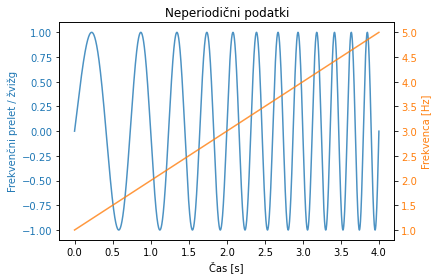

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pyExSi as es

fs = 44000
T = 4
t = np.linspace(0,T,fs*T+1)
x, _, fr = es.sine_sweep(time=t, freq_start=1, freq_stop=5, mode='linear', freq_return=True)

fig, ax1 = plt.subplots()
plt.title('Neperiodični podatki')

ax1.set_xlabel('Čas [s]')
ax1.set_ylabel('Frekvenčni prelet / žvižg', color='C0')
ax1.plot(t, x, color='C0', alpha=0.8)
ax1.tick_params(axis='y', labelcolor='C0')

ax2 = ax1.twinx() 
ax2.set_ylabel('Frekvenca [Hz]', color='C1')
ax2.plot(t, fr, color='C1', alpha=0.8) 
ax2.tick_params(axis='y', labelcolor='C1')
plt.show()

Pri analizi signalov nam občasno pomaga, da jih slišimo; spodaj lahko slišimo 4s dolg logaritemski žvižg od 100Hz do 16000Hz.

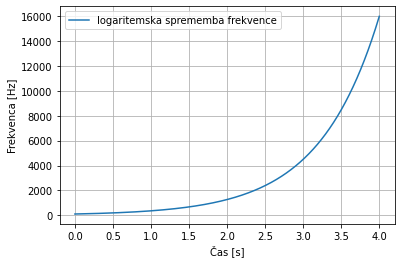

In [9]:
import numpy as np
import pyExSi as es
from IPython.display import Audio, display

fs = 44000
T = 4
t = np.linspace(0,T,fs*T+1)
x, _, fr = es.sine_sweep(time=t, freq_start=100, freq_stop=16000, mode='logarithmic', freq_return=True)
display(Audio(data=x, rate=fs))

plt.plot(t, fr, label='logaritemska sprememba frekvence')
plt.xlabel('Čas [s]')
plt.ylabel('Frekvenca [Hz]')
plt.grid()
plt.legend()
plt.show()

### Nekateri primeri naključnih podatkov

Spodja slika prikazuje naključne podatke z enakomerno porazdelitvijo. Na levi sliki je prikazanih prvih 50ms podatkov v času, desna slika pa prikazuje gostoto močnostnega spektra (podrobnosti si bomo pogledali v poglavju TBA). Opazimo lahko, da ima enakomerna porazdelitev tudi v frekvenčni domeni relativno konstano moč čez celotno analizirano frekvenčno področje (podatki so generirani s frekvenco vzorčenja 44kHz).

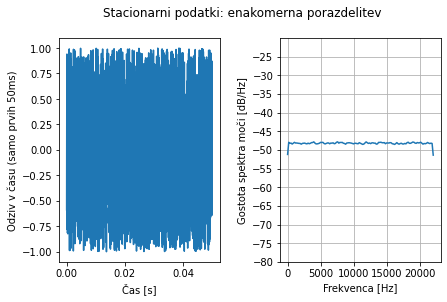

In [10]:
import numpy as np
import pyExSi as es
from IPython.display import Audio, display

fs = 44000
T = 4
t = np.linspace(0,T,fs*T+1)
N = len(t)
x = es.uniform_random(N=N)
sel = t<0.05
display(Audio(data=x, rate=fs))


fig, axs = plt.subplots(1,2)
fig.suptitle('Stacionarni podatki: enakomerna porazdelitev')
plt.tight_layout(pad=1, w_pad=3)
axs[0].plot(t[sel], x[sel])
axs[0].set_xlabel('Čas [s]')
axs[0].set_ylabel('Odziv v času (samo prvih 50ms)')
axs[1].psd(x, Fs=fs)
axs[1].set_xlabel('Frekvenca [Hz]')
axs[1].set_ylabel('Gostota spektra moči [dB/Hz]')
axs[1].set_ylim(-80, -20)
axs[1].set_yticks(np.arange(-80,-20,5))
plt.show()

Resnici na ljubo z vzbujanje dinamskih sistemov enakomerno porazdelitev redko uporabljamo; ponavadi si pomagamo z normalno (ali tudi Gaussovo) porazdelitvijo in pri tem dodatno oblikujemo frekvenčni spekter takega vzbujanja. Spodnja slika prikazuje normalno porazdelitev z enakomerno gostoto moči v frekvenčnem področju od 1000Hz do 4000Hz. 

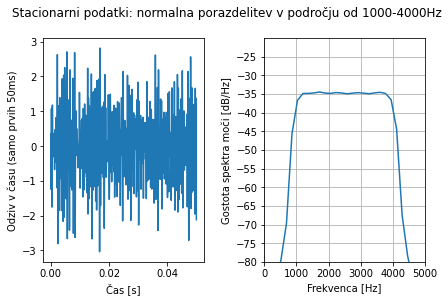

In [11]:
import numpy as np
import pyExSi as es
from IPython.display import Audio, display

fs = 44000
T = 4
t = np.linspace(0,T,fs*T+1)
N = len(t)

M = N // 2 + 1 # number of data points of frequency vector
freq = np.arange(0, M, 1) * fs / N # frequency vector
freq_lower = 1000 # PSD lower frequency limit  [Hz]
freq_upper = 4000 # PSD upper frequency limit [Hz]

PSD = es.get_psd(freq, freq_lower, freq_upper) # one-sided flat-shaped PSD
x = es.random_gaussian(N, PSD, fs)

sel = t<0.05
display(Audio(data=x, rate=fs))


fig, axs = plt.subplots(1,2)
fig.suptitle(f'Stacionarni podatki: normalna porazdelitev v področju od {freq_lower}-{freq_upper}Hz')
plt.tight_layout(pad=1, w_pad=3)
axs[0].plot(t[sel], x[sel])
axs[0].set_xlabel('Čas [s]')
axs[0].set_ylabel('Odziv v času (samo prvih 50ms)')
axs[1].psd(x, Fs=fs)
axs[1].set_xlabel('Frekvenca [Hz]')
axs[1].set_ylabel('Gostota spektra moči [dB/Hz]')
axs[1].set_xlim(0, 5000)
axs[1].set_ylim(-80, -20)
axs[1].set_yticks(np.arange(-80,-20,5))
plt.show()

Za primerjavo si poglejmo še normalno porazdelitev z enakomerno gostoto moči v frekvenčnem področju od 100Hz do 400Hz. 

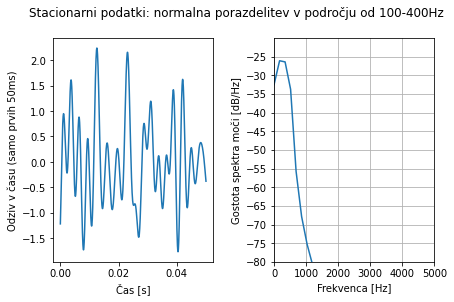

In [12]:
import numpy as np
import pyExSi as es
from IPython.display import Audio, display

fs = 44000
T = 4
t = np.linspace(0,T,fs*T+1)
N = len(t)

M = N // 2 + 1 # number of data points of frequency vector
freq = np.arange(0, M, 1) * fs / N # frequency vector
freq_lower = 100 # PSD lower frequency limit  [Hz]
freq_upper = 400 # PSD upper frequency limit [Hz]

PSD = es.get_psd(freq, freq_lower, freq_upper) # one-sided flat-shaped PSD
x = es.random_gaussian(N, PSD, fs)

sel = t<0.05
display(Audio(data=x, rate=fs))


fig, axs = plt.subplots(1,2)
fig.suptitle(f'Stacionarni podatki: normalna porazdelitev v področju od {freq_lower}-{freq_upper}Hz')
plt.tight_layout(pad=1, w_pad=3)
axs[0].plot(t[sel], x[sel], label='Enakomerna porazdelitev')
axs[0].set_xlabel('Čas [s]')
axs[0].set_ylabel('Odziv v času (samo prvih 50ms)')
axs[1].psd(x, Fs=fs)
axs[1].set_xlabel('Frekvenca [Hz]')
axs[1].set_ylabel('Gostota spektra moči [dB/Hz]')
axs[1].set_xlim(0, 5000)
axs[1].set_ylim(-80, -20)
axs[1].set_yticks(np.arange(-80,-20,5))
plt.show()

Poglejmo si še nestacionarno porazdeljene podatke. Začnemo s pripravo stacionarnih podatkov enakomerne gostote moči v frekvenčnem področju od 1000Hz do 4000Hz in nenormalno porazdelitvijo s parametrom sploščenosti 5 (ang. *kurtosis*). Stacionarne podatke nato moduliramo z nosilnim signalom v frekvenčnem področju od 10Hz do 20Hz, da dobimo nestacionarni signal. Kljub temu, da gostota moči podobno porazdeljena kakor zgoraj, se nenormalni in nestacionarni signal ponavadi sliši bistveno bolj neprijetno in je v primeru vibracijskega vzbujanja take oblike ponavadi tudi bistveno bolj škodljiv.

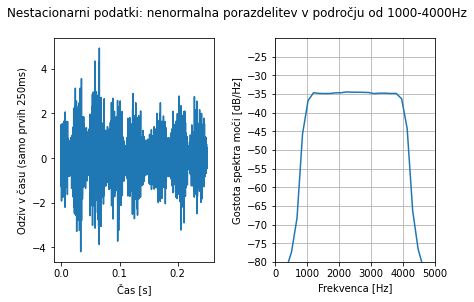

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pyExSi as es
from IPython.display import Audio, display

fs = 44000
T = 4
t = np.linspace(0,T,fs*T+1)
N = len(t)

M = N // 2 + 1 # number of data points of frequency vector
freq = np.arange(0, M, 1) * fs / N # frequency vector
freq_lower = 1000 # PSD lower frequency limit  [Hz]
freq_upper = 4000 # PSD upper frequency limit [Hz]
freq_lower_mod = 10 # modulating signals's PSD lower frequency limit  [Hz]
freq_upper_mod = 20 # modulating signals's PSD upper frequency limit [Hz]

PSD = es.get_psd(freq, freq_lower, freq_upper) # one-sided flat-shaped PSD
PSD_modulating = es.get_psd(freq, freq_lower_mod, freq_upper_mod) # one-sided flat-shaped PSD

k_u = 5
x = es.nonstationary_signal(N,PSD,k_u=k_u, fs=fs, modulating_signal=('PSD',PSD_modulating))

sel = t<0.25
display(Audio(data=x, rate=fs))


fig, axs = plt.subplots(1,2)
fig.suptitle(f'Nestacionarni podatki: nenormalna porazdelitev v področju od {freq_lower}-{freq_upper}Hz')
plt.tight_layout(pad=1, w_pad=3)
axs[0].plot(t[sel], x[sel])
axs[0].set_xlabel('Čas [s]')
axs[0].set_ylabel(f'Odziv v času (samo prvih 250ms)')
axs[1].psd(x, Fs=fs)
axs[1].set_xlabel('Frekvenca [Hz]')
axs[1].set_ylabel('Gostota spektra moči [dB/Hz]')
axs[1].set_xlim(0, 5000)
axs[1].set_ylim(-80, -20)
axs[1].set_yticks(np.arange(-80,-20,5))
plt.show()